IMPORT LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import KFold, train_test_split, cross_val_score, StratifiedKFold, cross_validate, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

DATA LOADING, PREPROCESSING, FEATURES SELECTION

In [3]:
Data  = pd.read_csv('Features.csv')
Data.head()

,Mean,Standard Deviation,SE of mean,Variance,Skewness,Kurtosis,Coefficient of Variation,Mean absolute Deviation,Mode,Harmonic Mean,Median,Flowrate
0,2.988890,0.112882,0.000564,0.012742,2.515207,10.459889,0.037767,0.070676,2.959532,2.684968,2.959532,Non Leakage
1,2.592975,0.110564,0.000553,0.012224,1.621947,10.901485,0.036941,0.168431,2.959532,2.989225,2.959532,Leakages
2,2.994869,0.111194,0.000556,0.012364,2.622178,10.918732,0.037128,0.088784,2.959532,2.591081,2.959532,Non Leakage
3,2.697241,0.112246,0.000561,0.012599,1.530313,10.554527,0.037450,0.106993,2.959532,2.993373,2.959532,Leakages
4,3.099304,0.111688,0.000558,0.012474,2.572693,10.724008,0.037238,0.069026,2.959532,2.695481,2.959532,Non Leakage


In [4]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Mean,95.0,2.952547,0.344636,2.210901,2.677466,2.983824,3.194066,3.590409
Standard Deviation,95.0,0.216993,0.093830,0.105666,0.143042,0.178072,0.283178,0.527360
SE of mean,95.0,0.001085,0.000469,0.000528,0.000715,0.000890,0.001416,0.002637
Variance,95.0,0.055797,0.049381,0.011165,0.020461,0.031710,0.080192,0.278109
Skewness,95.0,1.681448,0.705127,0.105874,1.068077,1.959233,2.216864,3.087566
Kurtosis,95.0,1.608022,3.113525,-0.108863,0.031603,0.092280,1.360765,10.918732
Coefficient of Variation,95.0,0.066654,0.026465,0.032369,0.044685,0.056632,0.087628,0.145273
Mean absolute Deviation,95.0,0.177436,0.077870,0.069026,0.112212,0.156761,0.226070,0.423559
Mode,95.0,3.201996,0.207585,2.959532,3.091983,3.091983,3.334910,3.798944
Harmonic Mean,95.0,2.961897,0.340572,2.457580,2.655876,2.885132,3.251625,3.661039


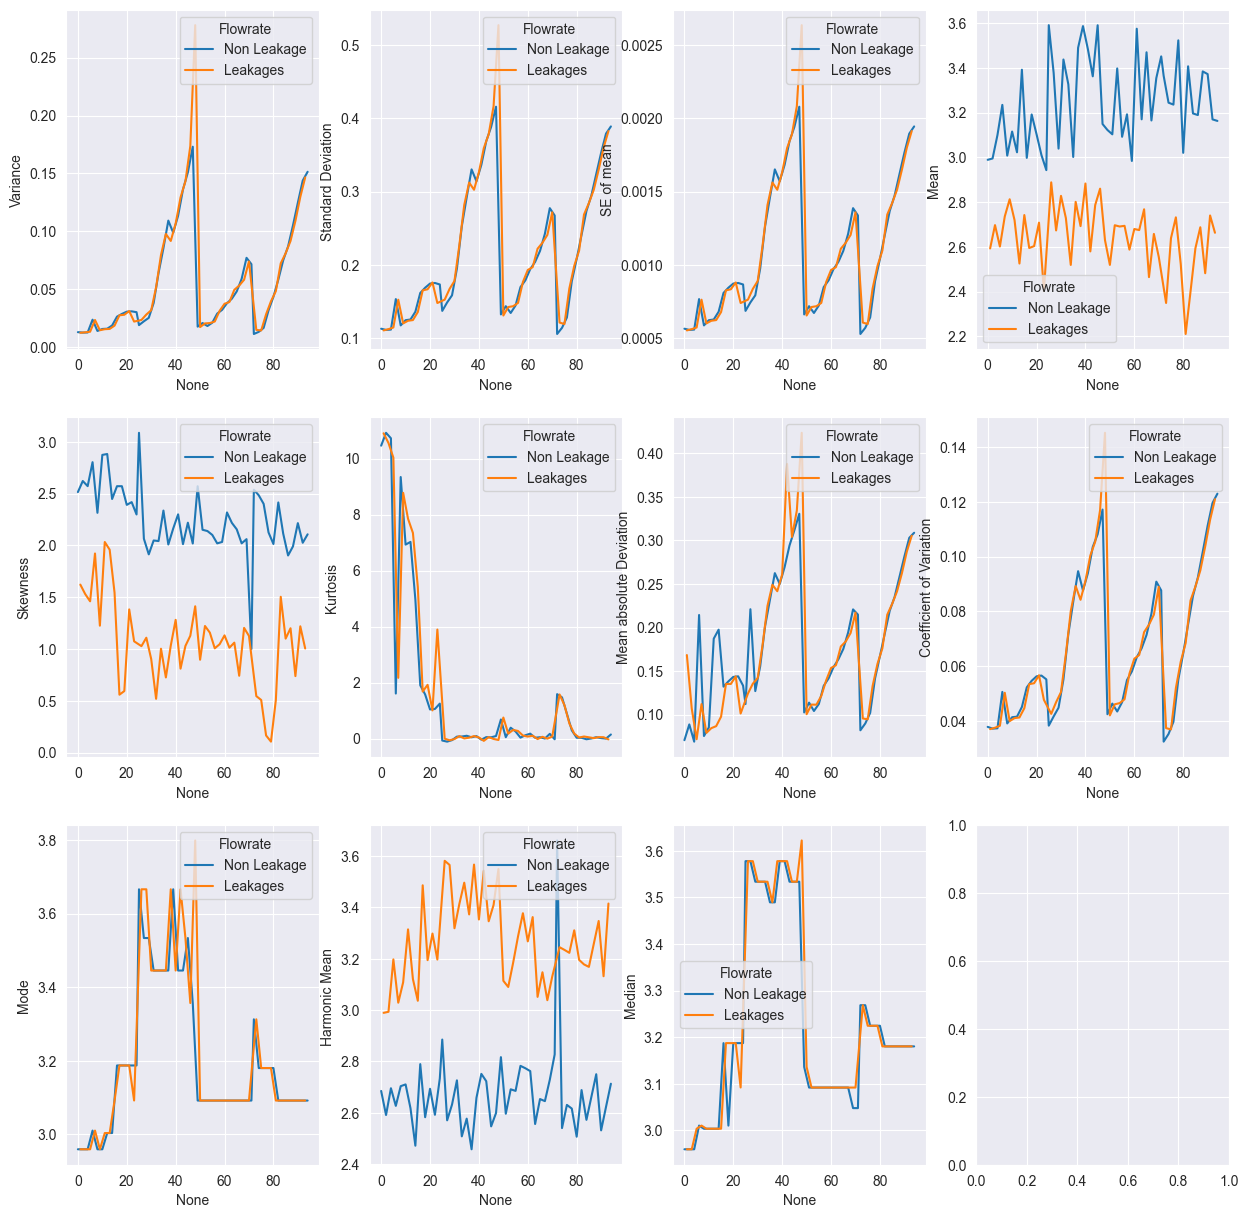

In [5]:
fig,axes = plt.subplots(3,4,figsize=(15,15))
sns.lineplot(ax = axes[0,0],data=Data, x=Data.index,y=Data['Variance'], hue=Data['Flowrate'])
sns.lineplot(ax = axes[0,1],data=Data, x=Data.index,y=Data['Standard Deviation '], hue=Data['Flowrate'])
sns.lineplot(ax = axes[0,2],data=Data, x=Data.index,y=Data['SE of mean'], hue=Data['Flowrate'])
sns.lineplot(ax = axes[0,3],data=Data, x=Data.index,y=Data['Mean '], hue=Data['Flowrate'])
sns.lineplot(ax = axes[1,0],data=Data, x=Data.index,y=Data['Skewness'], hue=Data['Flowrate'])
sns.lineplot(ax = axes[1,1],data=Data, x=Data.index,y=Data['Kurtosis'], hue=Data['Flowrate'])
sns.lineplot(ax = axes[1,2],data=Data, x=Data.index,y=Data['Mean absolute Deviation'], hue=Data['Flowrate'])
sns.lineplot(ax = axes[1,3],data=Data, x=Data.index,y=Data['Coefficient of Variation'], hue=Data['Flowrate'])
sns.lineplot(ax = axes[2,0],data=Data, x=Data.index,y=Data['Mode '], hue=Data['Flowrate'])
sns.lineplot(ax = axes[2,1],data=Data, x=Data.index,y=Data['Harmonic Mean '], hue=Data['Flowrate'])
sns.lineplot(ax = axes[2,2],data=Data, x=Data.index,y=Data['Median'], hue=Data['Flowrate'])
fig.savefig('rel.png')

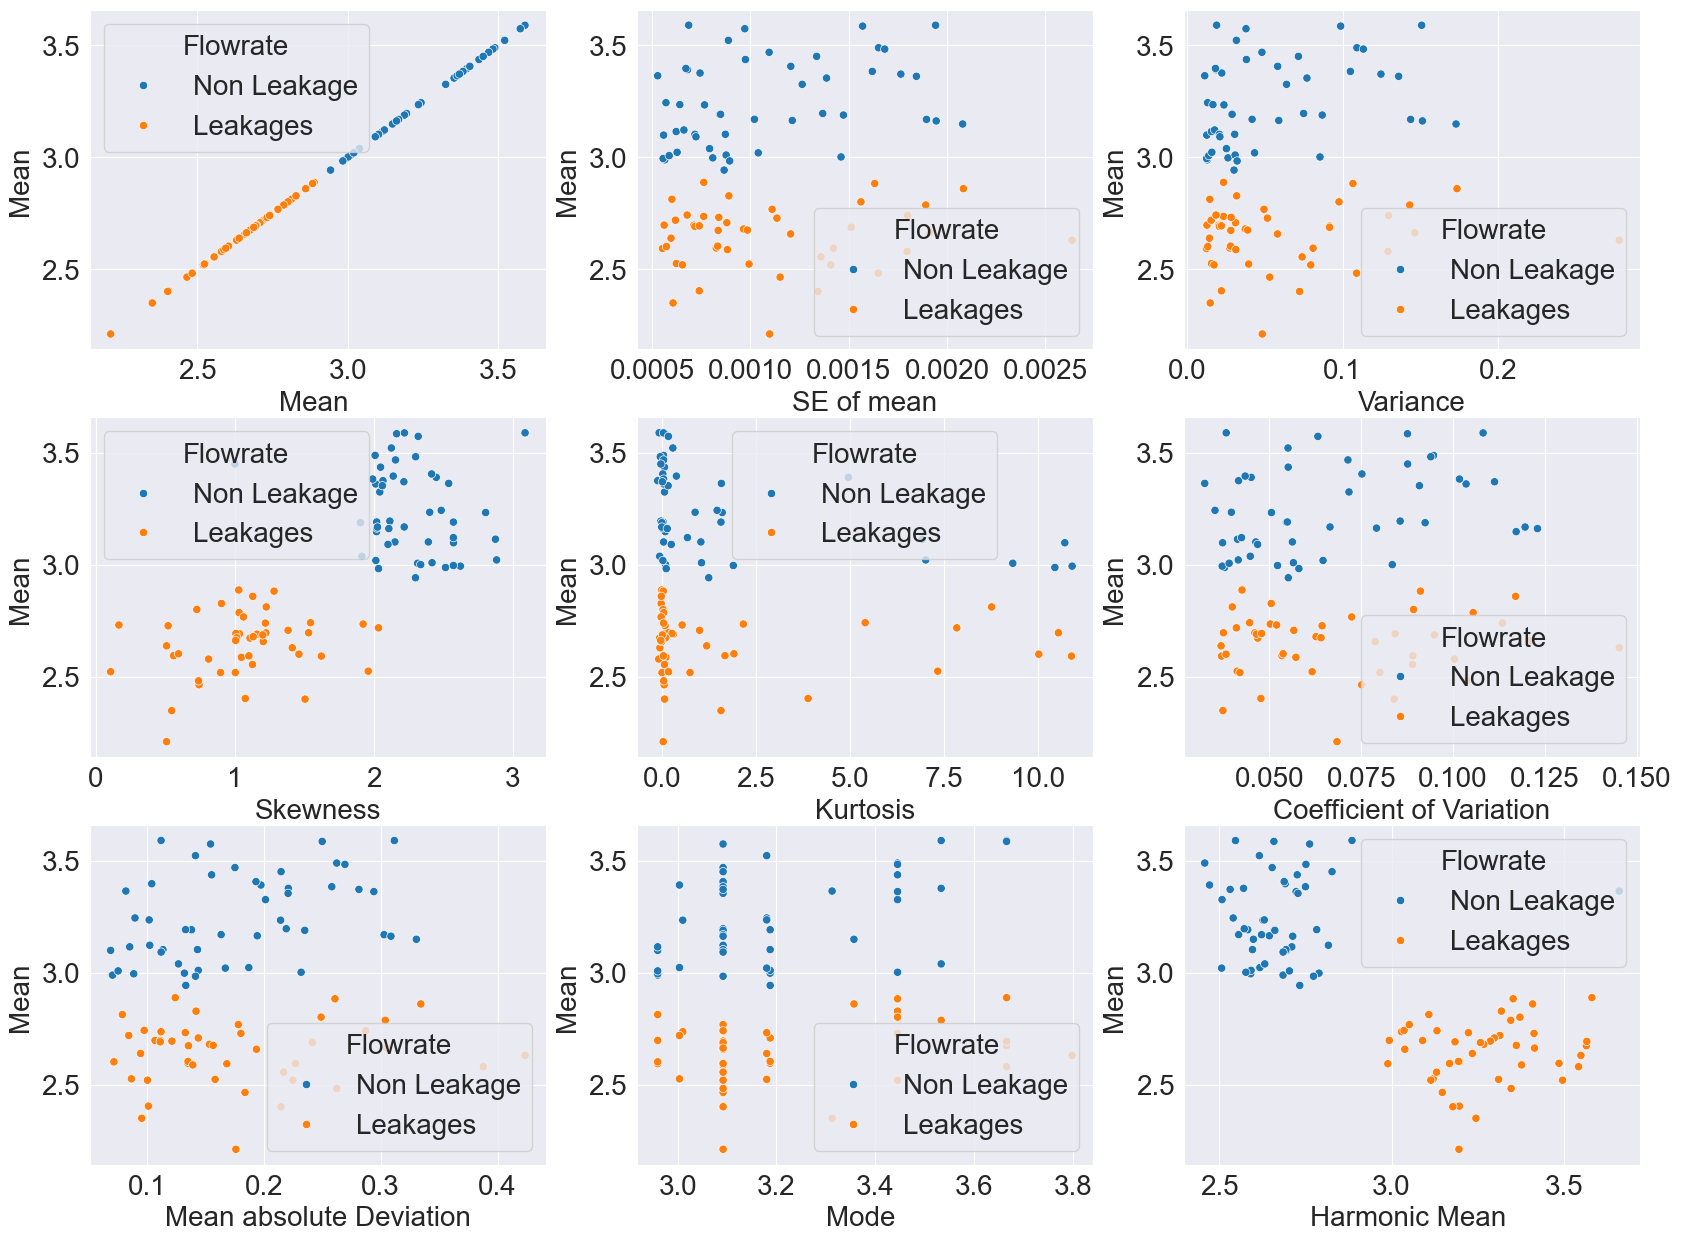

In [6]:
plt.rcParams.update({'font.size': 20})
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
sns.scatterplot(ax=axes[0, 0], data=Data, y='Mean ', x='Mean ', hue='Flowrate')
sns.scatterplot(ax=axes[0, 1], data=Data, y='Mean ', x='SE of mean', hue='Flowrate')
sns.scatterplot(ax=axes[0, 2], data=Data, y='Mean ', x='Variance',  hue='Flowrate')
sns.scatterplot(ax=axes[1, 0], data=Data, y='Mean ', x='Skewness', hue='Flowrate')
sns.scatterplot(ax=axes[1, 1], data=Data, y='Mean ', x='Kurtosis', hue='Flowrate')
sns.scatterplot(ax=axes[1, 2], data=Data, y='Mean ', x='Coefficient of Variation', hue='Flowrate')
sns.scatterplot(ax=axes[2, 0], data=Data, y='Mean ', x='Mean absolute Deviation', hue='Flowrate')
sns.scatterplot(ax=axes[2, 1], data=Data, y='Mean ', x='Mode ', hue='Flowrate')
sns.scatterplot(ax=axes[2, 2], data=Data, y='Mean ', x='Harmonic Mean ', hue='Flowrate')
plt.savefig('scatter.jpg')

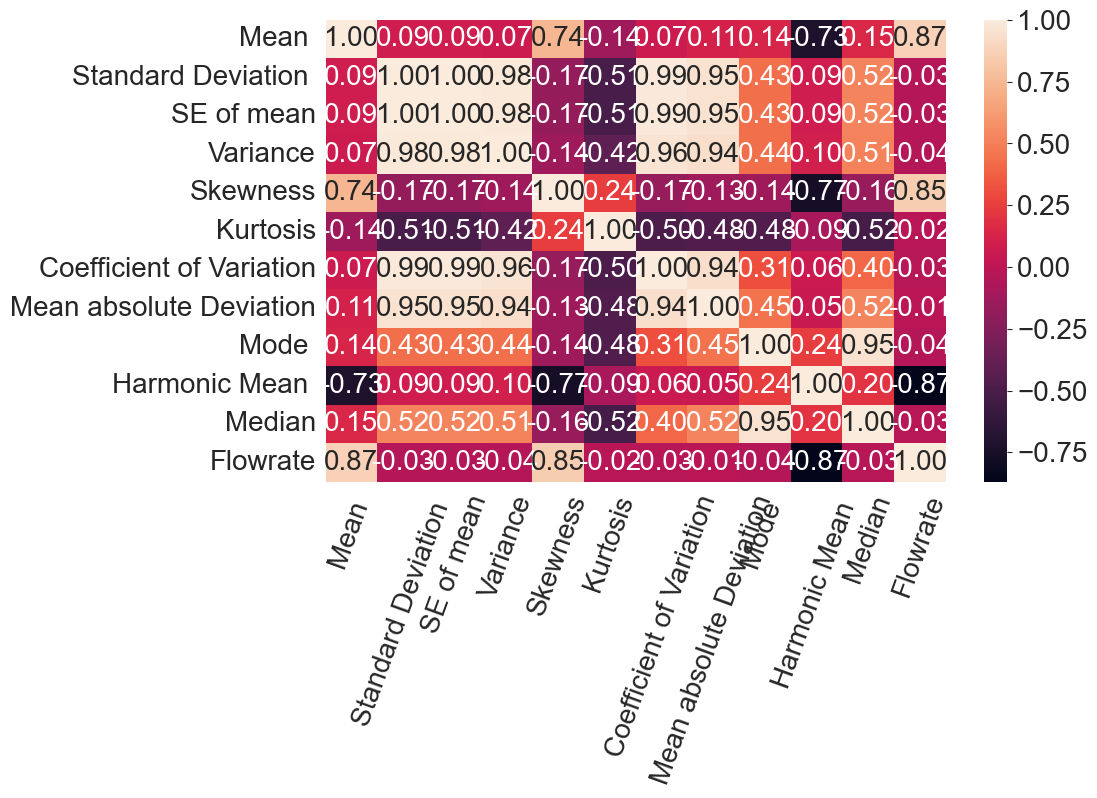

In [7]:
encoder = LabelEncoder()
scale = MinMaxScaler()
Data['Flowrate'] = encoder.fit_transform(Data['Flowrate'])
plt.figure(figsize=(10,6))
sns.heatmap(Data.corr(), annot=True, xticklabels=True, yticklabels=True, fmt='.2f')
plt.xticks(rotation = 70)
plt.savefig('Heatmap.jpg',transparent=True, bbox_inches='tight')


In [8]:
Data.head()

,Mean,Standard Deviation,SE of mean,Variance,Skewness,Kurtosis,Coefficient of Variation,Mean absolute Deviation,Mode,Harmonic Mean,Median,Flowrate
0,2.988890,0.112882,0.000564,0.012742,2.515207,10.459889,0.037767,0.070676,2.959532,2.684968,2.959532,1
1,2.592975,0.110564,0.000553,0.012224,1.621947,10.901485,0.036941,0.168431,2.959532,2.989225,2.959532,0
2,2.994869,0.111194,0.000556,0.012364,2.622178,10.918732,0.037128,0.088784,2.959532,2.591081,2.959532,1
3,2.697241,0.112246,0.000561,0.012599,1.530313,10.554527,0.037450,0.106993,2.959532,2.993373,2.959532,0
4,3.099304,0.111688,0.000558,0.012474,2.572693,10.724008,0.037238,0.069026,2.959532,2.695481,2.959532,1


In [9]:
feature_select  = SelectKBest(score_func=f_classif, k=5).fit(Data.iloc[:,:-1], Data.iloc[:,-1])
param = pd.DataFrame()
param['Features'] = Data.iloc[:,:-1].columns
param['F_score'] = feature_select.scores_
param['P_value'] = feature_select.pvalues_
param['Features_bool'] = feature_select.get_support()
param= param.sort_values(by='F_score', ascending=False)
param

,Features,F_score,P_value,Features_bool
0,Mean,295.590588,1.251905e-30,True
9,Harmonic Mean,290.013608,2.457376e-30,True
4,Skewness,238.425927,2.102654e-27,True
3,Variance,0.158564,6.913947e-01,True
8,Mode,0.155868,6.938932e-01,True
1,Standard Deviation,0.107657,7.435651e-01,False
2,SE of mean,0.107638,7.435869e-01,False
6,Coefficient of Variation,0.075180,7.845472e-01,False
10,Median,0.065453,7.986406e-01,False
5,Kurtosis,0.046661,8.294514e-01,False


In [10]:
x_train,x_test,y_train,y_test = train_test_split(Data[['Mean ','Harmonic Mean ','Skewness','Variance','Mode ']], Data.iloc[:,-1], test_size=0.2, random_state=0)
x_train.shape, x_test.shape

((76, 5), (19, 5))

In [11]:
splits = StratifiedKFold(n_splits=5,shuffle=True, random_state=0)
Svc = SVC()
Lda = LinearDiscriminantAnalysis()
Sv = cross_validate(Svc,x_train, y_train, cv=splits, return_train_score=True, return_estimator=True)
Lv = cross_validate(Lda, x_train, y_train, cv=splits,return_train_score=True, return_estimator=True)

In [12]:
scores = pd.DataFrame({'SVC': Sv['train_score'],
                      "LDA": Lv['train_score']})
scores

,SVC,LDA
0,1.000000,1.0
1,0.983607,1.0
2,0.983607,1.0
3,0.983607,1.0
4,0.983607,1.0


In [13]:
print('SVC: ', Sv['train_score'].mean())
print('LDA: ', Lv['train_score'].mean())

SVC:  0.9868852459016393
LDA:  1.0


In [14]:
k_neighbors =  range(3,9,2)
for k in k_neighbors:
    Cl_knn = KNeighborsClassifier(n_neighbors=k)
    knncv_scr = cross_validate(Cl_knn, x_train, y_train, cv=splits, return_estimator=True, return_train_score=True)
    knnscore = pd.DataFrame({k: knncv_scr['train_score']})   
    print(knnscore)

          3
0  1.000000
1  0.983607
2  0.983607
3  0.983607
4  0.983607
          5
0  1.000000
1  0.983607
2  0.983607
3  0.983607
4  0.983607
          7
0  1.000000
1  0.983607
2  0.983607
3  0.983607
4  0.983607


In [15]:
CRS_pred = Sv['estimator'][0].predict(x_train)
CRS_report = classification_report(y_train,CRS_pred, target_names=['leakages', 'Non Leakage'])
print(CRS_report)

              precision    recall  f1-score   support

    leakages       0.97      1.00      0.99        38
 Non Leakage       1.00      0.97      0.99        38

    accuracy                           0.99        76
   macro avg       0.99      0.99      0.99        76
weighted avg       0.99      0.99      0.99        76


In [16]:
CRS_pred = Sv['estimator'][0].predict(x_train)
CRS_report = classification_report(y_train,CRS_pred, target_names=['Leakages','Non Leakages'])
print(CRS_report)

              precision    recall  f1-score   support

    Leakages       0.97      1.00      0.99        38
Non Leakages       1.00      0.97      0.99        38

    accuracy                           0.99        76
   macro avg       0.99      0.99      0.99        76
weighted avg       0.99      0.99      0.99        76


In [17]:
knn_pred =knncv_scr['estimator'][0].predict(x_train)
knn_report = classification_report(y_train,knn_pred, target_names=['Leakages','Non Leakage'])
print(knn_report)

              precision    recall  f1-score   support

    Leakages       0.97      1.00      0.99        38
 Non Leakage       1.00      0.97      0.99        38

    accuracy                           0.99        76
   macro avg       0.99      0.99      0.99        76
weighted avg       0.99      0.99      0.99        76


In [18]:
Lda_pred = Lv['estimator'][0].predict(x_train)
Lda_report = classification_report(y_train,Lda_pred, target_names=['leakages', 'Non Leakages'])
print(Lda_report)

              precision    recall  f1-score   support

    leakages       0.97      1.00      0.99        38
Non Leakages       1.00      0.97      0.99        38

    accuracy                           0.99        76
   macro avg       0.99      0.99      0.99        76
weighted avg       0.99      0.99      0.99        76


In [19]:
gdModel = KNeighborsClassifier()
params = [{ 'n_neighbors':[3,5,7,9],
            'weights' : ['uniform', 'distance'],
            'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
             'leaf_size' : [5,10,15,10]
          }]
Gdkmodel = GridSearchCV(estimator=gdModel, param_grid=params, scoring='accuracy', return_train_score=True, cv=splits)
Gdkmodel.fit(x_train, y_train)
print(Gdkmodel.best_params_)
print(Gdkmodel.best_score_)

{'algorithm': 'auto', 'leaf_size': 5, 'n_neighbors': 3, 'weights': 'uniform'}
0.9875


In [20]:
gdsModel = SVC()
params = [{'C': [0.1, 1, 10, 100, 1000],
           'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
           'kernel': ['rbf', 'linear']
          }]
Gdsmodel = GridSearchCV(estimator=gdsModel, param_grid=params, scoring='accuracy', return_train_score=True, cv=splits)
Gdsmodel.fit(x_train, y_train)
print(Gdsmodel.best_params_)
print(Gdsmodel.best_score_)

{'C': 10, 'gamma': 1, 'kernel': 'linear'}
1.0


In [21]:
gdlModel =  LinearDiscriminantAnalysis()
grid = dict()
grid['solver'] = ['svd', 'eigen','lsqr']
grid['shrinkage'] = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,]
Gdlmodel = GridSearchCV(gdlModel, param_grid = grid, scoring='accuracy', return_train_score=True, cv=splits)
Gdlmodel.fit(x_train, y_train)
print('Best Prams:', Gdlmodel.best_params_)
print('Best Score:', Gdlmodel.best_score_)

Best Prams: {'shrinkage': 0.3, 'solver': 'eigen'}
Best Score: 1.0


C:\Users\Dell\PycharmProjects\Start\venv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
50 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dell\PycharmProjects\Start\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell\PycharmProjects\Start\venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Dell\PycharmProjects\Start\venv\Lib\site-packages\skl

In [22]:
from sklearn.metrics import accuracy_score

for k in range(3, 9, 2):  #'algorithm': 'auto', 'leaf_size': 5, 'n_neighbors': 3, 'weights': 'uniform'
    cl_knn1 = KNeighborsClassifier(n_neighbors=k, algorithm='auto', leaf_size=5, weights='uniform')
    cl_knn1.fit(x_train, y_train)
    knn_pred = cl_knn1.predict(x_train)
    knn_prob = cl_knn1.predict_proba(x_test)
    print(cl_knn1.score(x_train, y_train))

0.9868421052631579
0.9868421052631579
0.9868421052631579


In [23]:
C= [1,10,100,1000]
for c in C:
    cl_svm = SVC(C=c, gamma=1,kernel='rbf')
    cl_svm.fit(x_train,y_train)
    svm_pred = cl_svm.predict(x_train)
    #svm_prob = cl_svm.predict_proba(X_test)
    print(cl_svm.score(x_train, y_train))

1.0
1.0
1.0
1.0


In [24]:
cl_lda = LinearDiscriminantAnalysis(shrinkage=0.3, solver='eigen')
cl_lda.fit(x_train,y_train)
lda_pred = cl_lda.predict(x_train)
print(cl_lda.score(x_train, y_train))
Ltrain_report = classification_report(y_train, lda_pred, output_dict=True, target_names=['Leakages','Non Leakages'])
Lreport = pd.DataFrame(Ltrain_report).transpose()
Ltrain_M = confusion_matrix(y_train,lda_pred)
Lreport

1.0


,precision,recall,f1-score,support
Leakages,1.0,1.0,1.0,38.0
Non Leakages,1.0,1.0,1.0,38.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,76.0
weighted avg,1.0,1.0,1.0,76.0


In [25]:
cl_knn1 = KNeighborsClassifier(n_neighbors=3)
cl_knn1.fit(x_train, y_train)
Ktrain_pred = cl_knn1.predict(x_train)
print(cl_knn1.score(x_train,y_train))
ktrain_report = classification_report(y_train,Ktrain_pred, target_names=['Leakages','Non Leakages'], output_dict=True)
KTrain = pd.DataFrame(ktrain_report).transpose()
Ktrain_M  = confusion_matrix(y_train,Ktrain_pred)
KTrain

0.9868421052631579


,precision,recall,f1-score,support
Leakages,0.974359,1.000000,0.987013,38.000000
Non Leakages,1.000000,0.973684,0.986667,38.000000
accuracy,0.986842,0.986842,0.986842,0.986842
macro avg,0.987179,0.986842,0.986840,76.000000
weighted avg,0.987179,0.986842,0.986840,76.000000


In [26]:
cl_svm = SVC(C=1000, gamma=1,kernel='rbf')
cl_svm.fit(x_train,y_train)
print(cl_svm.score(x_train,y_train))
Strain_pred = cl_svm.predict(x_train)
Strain_report = classification_report(y_train, Strain_pred, target_names=['Leakages','Non Leakages'], output_dict=True)
STrain = pd.DataFrame(Strain_report).transpose()
Strain_M = confusion_matrix(y_train, Strain_pred)

1.0


In [27]:
knnt_pred = cl_knn1.predict(x_test)
ldat_pred = cl_lda.predict(x_test)
svmt_pred = cl_svm.predict(x_test)


y_test = list(y_test)
outcomes = pd.DataFrame(data=y_test, columns=['Actual value'])
outcomes['KNN_PRED'] = knnt_pred
outcomes['LDA_PRED'] = ldat_pred
outcomes['SVM_PRED'] = svmt_pred
outcomes

,Actual value,KNN_PRED,LDA_PRED,SVM_PRED
0,1,1,1,1
1,0,0,0,0
2,0,0,0,0
3,1,1,1,1
4,0,0,0,0
5,1,1,1,1
6,0,0,0,0
7,1,1,1,1
8,1,1,1,1
9,0,0,0,0


In [28]:
print('KNN Accuracy: ', accuracy_score(y_test, knnt_pred))
print('SVM Accuracy: ', accuracy_score(y_test, svmt_pred))
print('LDA Accuracy: ', accuracy_score(y_test, ldat_pred))

KNN Accuracy:  1.0
SVM Accuracy:  1.0
LDA Accuracy:  1.0


In [29]:
knnpreport = confusion_matrix( y_test,knnt_pred)
ktest_report = classification_report(y_test, knnt_pred, output_dict=True, target_names=['Leakages','Non Leakages'])
KT_report = pd.DataFrame(ktest_report).transpose()
svmpreport = confusion_matrix( y_test,svmt_pred)
stest_report = classification_report(y_test, svmt_pred, output_dict=True, target_names=['Leakages','Non Leakages'])
ST_report =pd.DataFrame(stest_report).transpose()
ldapreport = confusion_matrix( y_test,ldat_pred)
ltest_report = classification_report(y_test,ldat_pred, output_dict=True, target_names=['Leakages','Non Leakages'])
LT_report = pd.DataFrame(ltest_report).transpose()

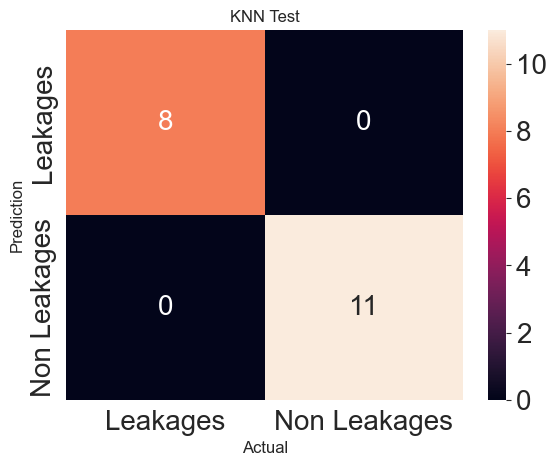

In [30]:

sns.heatmap(knnpreport,
            annot=True,
            cbar=True,
            fmt='g',
            xticklabels=['Leakages','Non Leakages'],
            yticklabels=['Leakages','Non Leakages']
            )
plt.ylabel('Prediction',fontsize=12)
plt.xlabel('Actual',fontsize=12)
plt.title('KNN Test',fontsize=12)
plt.savefig('kNN.png')
plt.show()

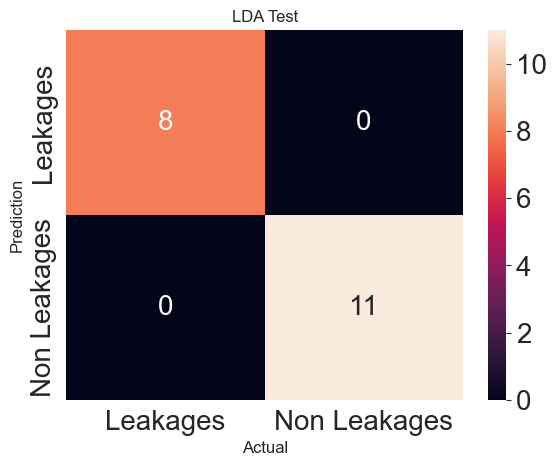

In [31]:
sns.heatmap(ldapreport,
            annot=True,
            cbar=True,
            fmt='g',
            xticklabels=['Leakages','Non Leakages'],
            yticklabels=['Leakages','Non Leakages']
            )
plt.ylabel('Prediction',fontsize=12)
plt.xlabel('Actual',fontsize=12)
plt.title('LDA Test',fontsize=12)
plt.savefig('LDA.png')
plt.show()

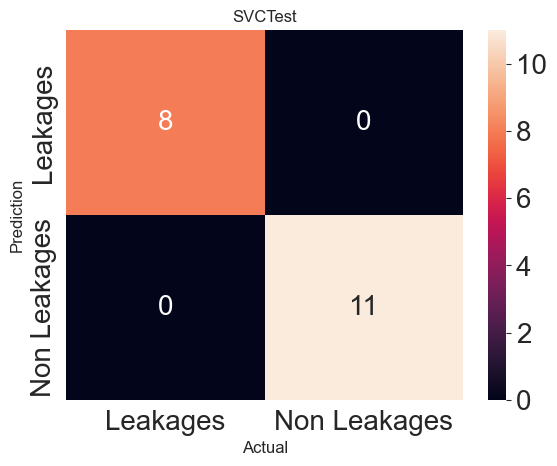

In [32]:
sns.heatmap(svmpreport,
            annot=True,
            cbar=True,
            fmt='g',
            xticklabels=['Leakages','Non Leakages'],
            yticklabels=['Leakages','Non Leakages']
            )
plt.ylabel('Prediction',fontsize=12)
plt.xlabel('Actual',fontsize=12)
plt.title('SVCTest',fontsize=12)
plt.savefig('SVC.png')
plt.show()

PCA

In [33]:
print('KNN accuracy :', accuracy_score(y_test, knnt_pred))
print('SVM accuracy :', accuracy_score(y_test, svmt_pred))
print('LDA accuracy :', accuracy_score(y_test, ldat_pred))

KNN accuracy : 1.0
SVM accuracy : 1.0
LDA accuracy : 1.0


<BarContainer object of 1 artists>

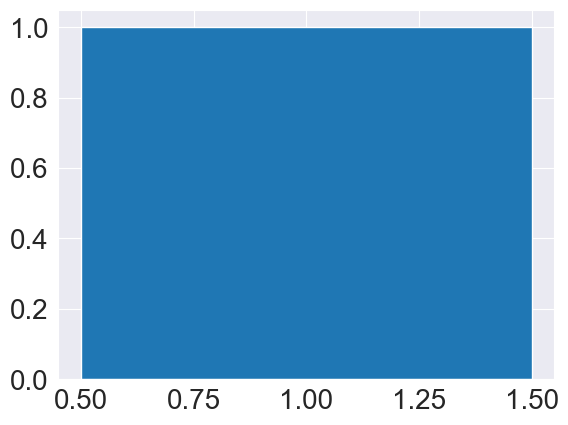

In [38]:
plt.bar(accuracy_score(y_test, knnt_pred),accuracy_score(y_test, svmt_pred),accuracy_score(y_test, ldat_pred))

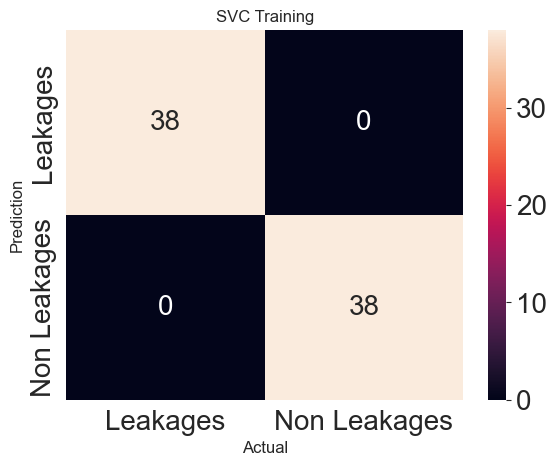

In [34]:
sns.heatmap(Strain_M,
            annot=True,
            cbar=True,
            fmt='g',
            xticklabels=['Leakages', 'Non Leakages'],
            yticklabels=['Leakages', 'Non Leakages']
            )
plt.ylabel('Prediction', fontsize=12)
plt.xlabel('Actual', fontsize=12)
plt.title('SVC Training', fontsize=12)
plt.savefig('Strain.png')
plt.show()

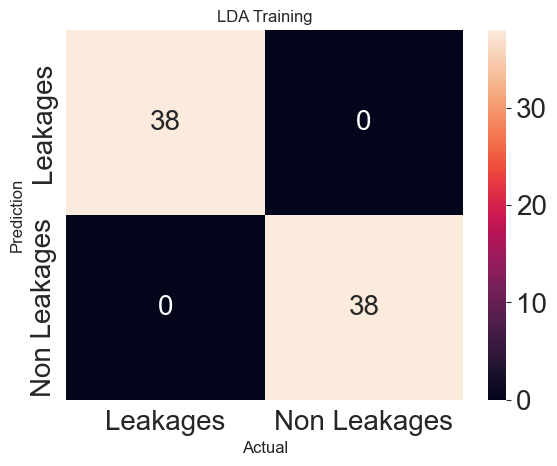

In [35]:
sns.heatmap(Ltrain_M,
            annot=True,
            cbar=True,
            fmt='g',
            xticklabels=['Leakages', 'Non Leakages'],
            yticklabels=['Leakages', 'Non Leakages']
            )
plt.ylabel('Prediction', fontsize=12)
plt.xlabel('Actual', fontsize=12)
plt.title('LDA Training', fontsize=12)
plt.savefig('Ltrain.png')
plt.show()

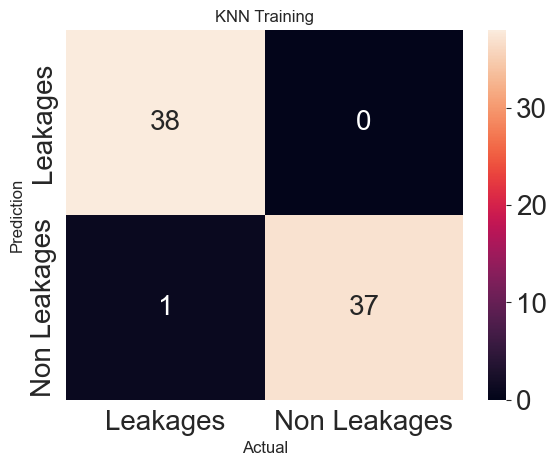

In [36]:
sns.heatmap(Ktrain_M,
            annot=True,
            cbar=True,
            fmt='g',
            xticklabels=['Leakages', 'Non Leakages'],
            yticklabels=['Leakages', 'Non Leakages']
            )
plt.ylabel('Prediction', fontsize=12)
plt.xlabel('Actual', fontsize=12)
plt.title('KNN Training', fontsize=12)
plt.savefig('Ktrain.png')
plt.show()